## Soluzione Esercizio 2

Implementare la seguente funzione che ritorna il gradiente numerico della `log_loss` su un punto `a,a0`

```python
def logistic_der(X, y, a, a0, delta=0.001):
    pass
```
I parametri `X`, `y`, `a` e `a0` hanno le stesse catatteristiche dell'esercizio precedente. Ritorna una coppia `g`, `g0` dove `g` è un vettore dalla dimensione di `a` e contiene le derivate paziali sui coefficienti calcolati in `a` mentre `g0` è da derivata di `log_los` rispetto al termine noto calcolata in `a0`.

In [4]:
def logistic(z):
    return 1/(1+m.e**(-z))

def log_loss(X, y, a, a0, eta=0):
    ll_sum = 0
    for i in range(X.shape[1]):
        x = X[:,i:i+1]
        guess = logistic(a.T.dot(x)[0][0]+a0)
        if guess in (0,1):
            print('*********', guess)
        ll_sum += y[i]*m.log10(guess) + (1-y[i])*m.log10(1-guess)
    return -( ll_sum  + eta*(a**2).sum() ) # al valore calcolato sommiamo il regolarizzatore

def logistic_der(X, y, a, a0, delta=0.001, eta=0.5):
    g = np.zeros(a.shape)
    for i in range(a.shape[0]):
        delta_v = np.zeros(a.shape)
        delta_v[i,0] = delta
        g[i, 0] = ( log_loss( X, y, a + delta_v, a0, eta) -\
                   log_loss( X, y, a - delta_v, a0, eta) )\
            / (2*delta)
    g0 = ( log_loss( X, y, a, a0+delta, eta) -\
          log_loss( X, y, a, a0-delta, eta) ) / (2*delta)
    return g, g0

# Gradiend descend e classificatore lineare logistico

Implementare l'algoritmo *gradient descent* tarato sulla *log_loss*.

```python
def logistic_gd(X, y, step, eps, max_iter):
    pass
```

`X` è un vettore di `d` righe per `n` colonne. La funzione ritorna il vettore dei coefficienti `a` di dimensione $d\times 1$ e lo scalare `a0`, il termine noto.


In [15]:
def logistic_dg( X, y, step, eps, max_iter, eta=0):
    curr_a = np.zeros( (X.shape[0], 1) )
    curr_a0 = 0
    
    for t in range(max_iter):
        curr_grad, curr_grad0 = logistic_der(X, y, curr_a, curr_a0, eta=eta)
        
        next_a  = curr_a - step*curr_grad
        next_a0 = curr_a0 - step*curr_grad0
        
        if abs( log_loss(X, y, next_a, next_a0, eta=eta) -\
               log_loss(X, y, curr_a, curr_a0, eta=eta) ) < eps:
            curr_a, curr_a0 = next_a, next_a0
            break
        
        curr_a, curr_a0 = next_a, next_a0
    print('iter:', t)
    return curr_a, curr_a0

iter: 17009
[[ 1.11375385]
 [-2.01457733]] 2.6222478769974673
iter: 31837
[[ 1.72396714]
 [-3.31346025]] 3.8630595346908057


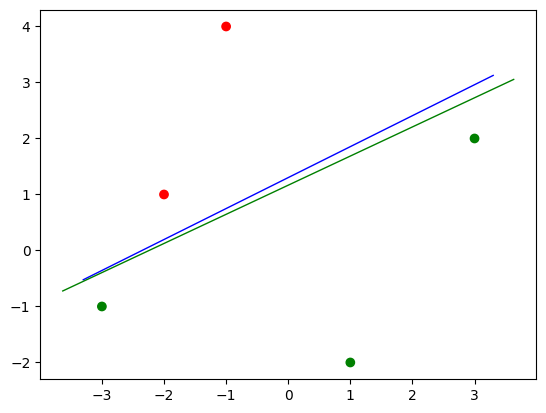

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

X = [ (3, 2), (-1, 4), (-2, 1), (1,-2), (-3,-1) ]
y = [1,0,0,1,1]

X = np.array(X).T

plt.scatter(X[0], X[1], c=['g' if e == 1 else 'r' for e in y])

for eta,color in ((0,'b'), (0.01,'g')): # proviamo con due diversi valori di eta
    a, a0 = logistic_dg(X, y, step=0.001, eps=0.00001, max_iter=100000,eta=eta)

    ax = plt.gca()
    xlim_left, xlim_right = ax.get_xlim()
    ylim_bottom, ylim_top = ax.get_ylim()

    plt.plot( ( xlim_left, xlim_right) , [ (-x*a[0][0]-a0)/a[1][0] for x in  (xlim_left, xlim_right) ],\
                 linewidth=1, c = color, zorder=0 )

    print(a, a0)